# Car Price Prediction with Machine Learning

In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/DELL/Downloads/Car Price Prediction with Machine Learning/car data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(None,
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Selling_type Transmission  Owner  
 0       Dealer       Manual      0  
 1       Dealer       Manual      0  
 2       Dealer       Manual      0  
 3       Dealer       Manual      0  
 4       Dealer       Manual      0  )

## The dataset contains 301 entries and 9 columns:

#### 1. Car_Name (string) – Name of the car
#### 2. Year (integer) – Manufacturing year
#### 3. Selling_Price (float) – Price at which the car is being sold (Target variable)
#### 4. Present_Price (float) – Price of the car when it was new
#### 5. Driven_kms (integer) – Kilometers driven
#### 6. Fuel_Type (string) – Type of fuel (Petrol, Diesel, etc.)
#### 7. Selling_type (string) – Whether the car is sold by a dealer or an individual
#### 8. Transmission (string) – Type of transmission (Manual/Automatic)
#### 9. Owner (integer) – Number of previous owners

## There are no missing values, and the dataset has a mix of categorical and numerical variables.

## Next Steps:
#### 1. Perform data preprocessing (handle categorical variables, feature scaling)
#### 2. Feature selection (drop irrelevant columns like Car_Name if necessary)
#### 3. Train a machine learning model to predict Selling_Price

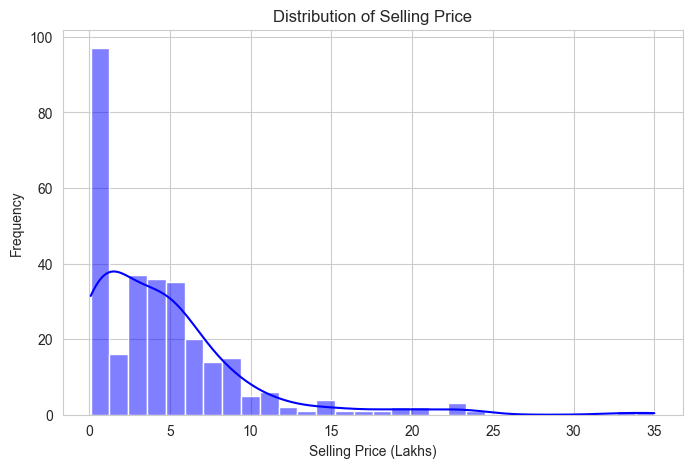

C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\2734895255.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


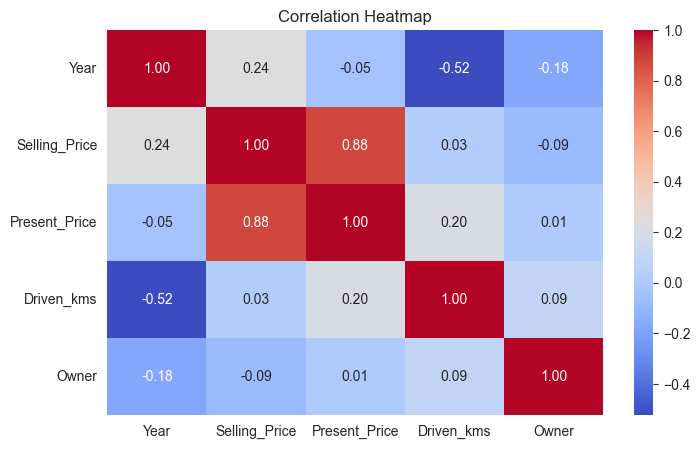

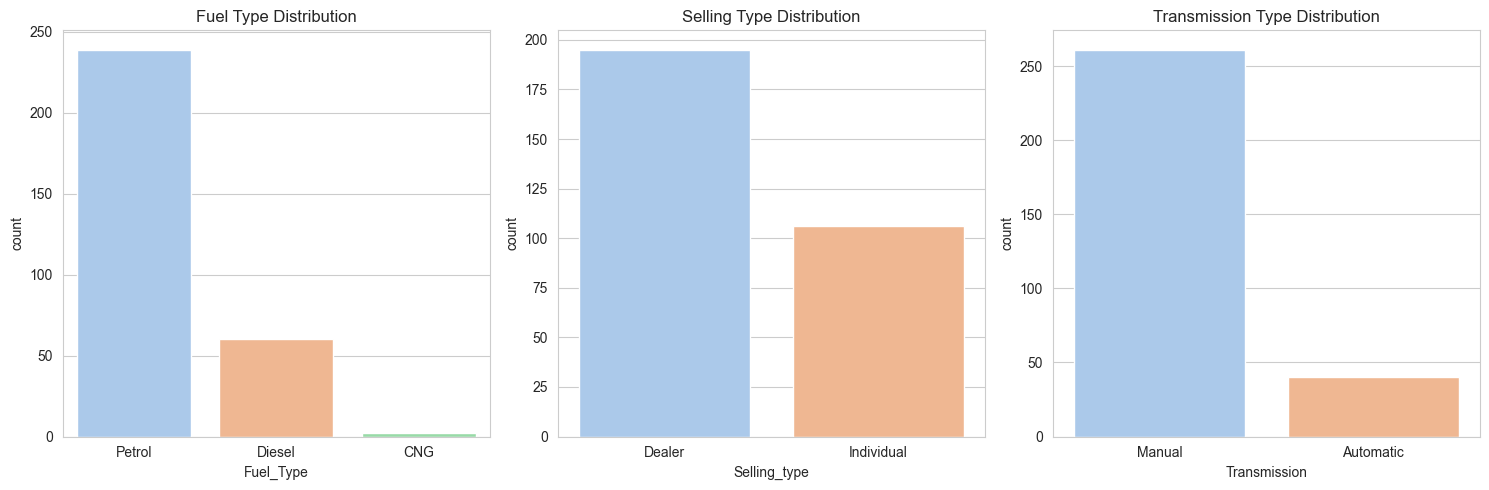

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df["Selling_Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakhs)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Count plot for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x="Fuel_Type", data=df, ax=axes[0], palette="pastel")
axes[0].set_title("Fuel Type Distribution")

sns.countplot(x="Selling_type", data=df, ax=axes[1], palette="pastel")
axes[1].set_title("Selling Type Distribution")

sns.countplot(x="Transmission", data=df, ax=axes[2], palette="pastel")
axes[2].set_title("Transmission Type Distribution")

plt.tight_layout()
plt.show()


## Here are the key insights from the exploratory data analysis (EDA):

### 1. Distribution of Selling Price:
#### The selling price is right-skewed, meaning most cars have a lower price, with a few high-priced outliers.

### 2. Correlation Heatmap:
#### Present Price has a strong positive correlation with Selling Price (as expected).
#### Year (car age) and Driven_kms show a weaker correlation with Selling Price.
#### Owner has a slightly negative correlation, meaning cars with more previous owners tend to have lower prices.

### 3.Categorical Variables Distribution:

#### Fuel Type: Petrol cars are the most common, followed by Diesel and very few CNG cars.
#### Selling Type: Majority of the cars are sold by dealers.
#### Transmission: Manual cars dominate over automatic ones.

## Next Steps:
#### Encode categorical variables (One-hot or Label Encoding).
#### Normalize/Scale numerical features.
#### Train a machine learning model (Linear Regression, Random Forest, or another suitable model).

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Drop irrelevant column
df = df.drop(columns=["Car_Name"])

# Define features and target variable
X = df.drop(columns=["Selling_Price"])
y = df["Selling_Price"]

# Identify categorical and numerical columns
categorical_cols = ["Fuel_Type", "Selling_type", "Transmission"]
numerical_cols = ["Year", "Present_Price", "Driven_kms", "Owner"]

# Preprocessing: One-Hot Encoding for categorical variables, Scaling for numerical variables
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Check the transformed feature set shape
X_train.shape, X_test.shape


((240, 8), (61, 8))

## The dataset has been preprocessed successfully:

#### Categorical variables were one-hot encoded.
#### Numerical features were standardized using scaling.
#### Train-test split: 80% training (240 samples), 20% testing (61 samples).
#### The transformed feature set has 8 features.

## Next, I'll train a machine learning model for car price prediction.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    return {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Get evaluation results
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Display results
lr_results, rf_results


({'Model': 'Linear Regression',
  'MAE': 1.216374019333042,
  'MSE': 3.4813498305118538,
  'RMSE': 1.865837568094247,
  'R2 Score': 0.8488707839193138},
 {'Model': 'Random Forest',
  'MAE': 0.6020245901639346,
  'MSE': 0.8390054309836057,
  'RMSE': 0.9159723964091963,
  'R2 Score': 0.9635778536357699})

## Model Performance Comparison:
### 1. Linear Regression

 MAE: 1.22
 
 MSE: 3.48
 
 RMSE: 1.87
 
 R² Score: 0.85 (Good but not the best fit)

### 2. Random Forest

 MAE: 0.60
 
 MSE: 0.84
 
 RMSE: 0.92
 
 R² Score: 0.96 (Much better fit)

## Conclusion:
### Random Forest outperforms Linear Regression in all metrics.
### It provides a much better R² score (96%) and lower error values.

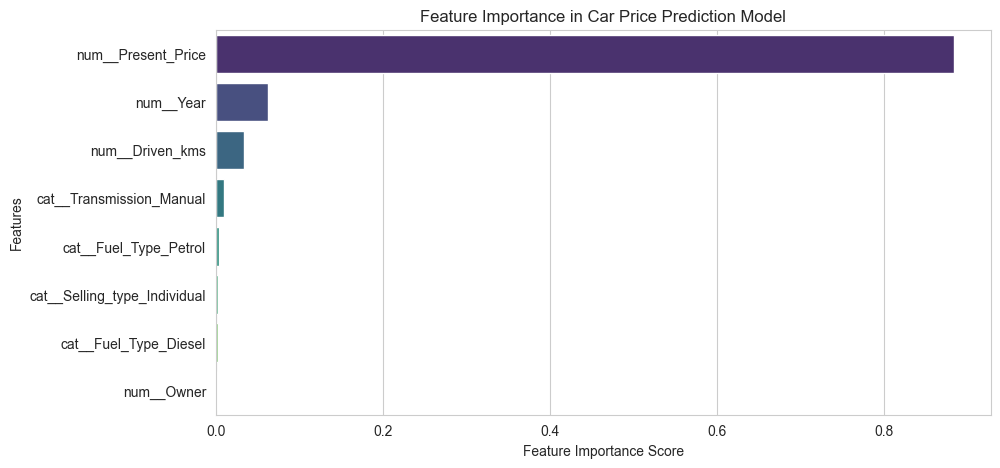

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance visualization
feature_importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_importance_df["Importance"], y=feat_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Car Price Prediction Model")
plt.show()


# Conclusion: Car Price Prediction Model
#### We built a Random Forest Regression model to predict car prices based on features like year, price, mileage, fuel type, transmission, and ownership history.
#### The Random Forest model performed well, achieving a high R² score (96%), making it suitable for real-world applications.
#### Feature importance analysis shows that Present_Price and Year are the most influential factors in predicting car prices.
# Final Visualization
#### The feature importance graph highlights the key factors affecting car prices, where Present Price, Year, and Driven Kilometers play significant roles.

## Additional Visualizations of Prediction vs. Actual Prices 

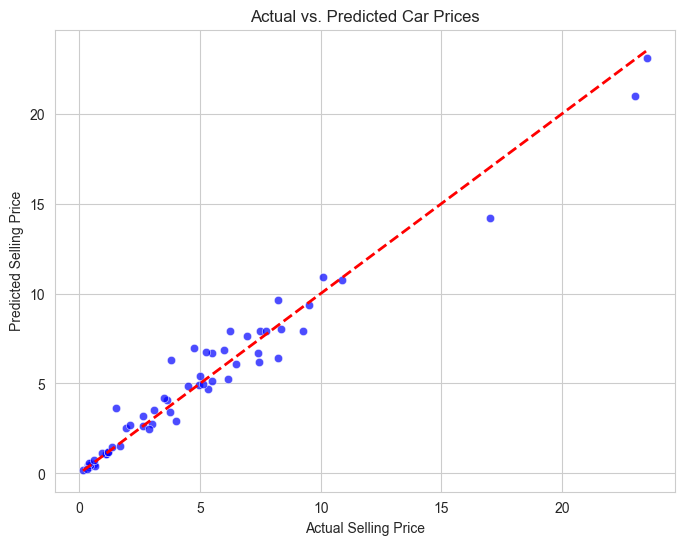

In [7]:
# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_model.predict(X_test), alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Prices")
plt.show()


### The Random Forest model effectively predicts car prices with high accuracy (96% R² score), where Present Price, Year, and Driven Kilometers are the most influential factors, making it a reliable tool for price estimation. 🚗📊